In [1]:
import time
from tools.LOF import LOF

ks = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]

for feature in ['all','real','reactive','harmonic']:
    AUC_Scores = []
    times = []

    print('----------')
    print('Features used: ' + feature)
    
    for k in ks:
        lof = LOF(feature=feature, suppress_progress=False)
        lof.k = k
        
        start = time.time()
        anomaly_score, y = lof.cluster_all()
        end = time.time()
        
        sc = round(lof.auc_score(anomaly_score, y), 3)
        AUC_Scores.append(sc)

        avrg_run = round(( (end - start)/5000 ), 2)
        times.append( avrg_run )

    print(max(AUC_Scores))
    print(AUC_Scores)
    print(times)
    print(ks)

    print('----------')

KeyboardInterrupt: 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'AUC')

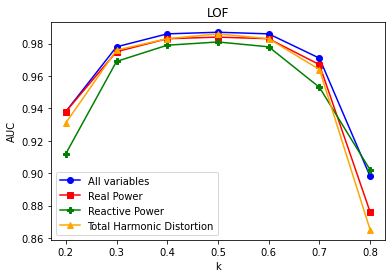

In [9]:
param = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

alll =     [0.938, 0.978, 0.986, 0.987, 0.986, 0.971, 0.898]
real =     [0.938, 0.975, 0.983, 0.984, 0.983, 0.967, 0.876]
reactive = [0.912, 0.969, 0.979, 0.981, 0.978, 0.953, 0.902]
THD =      [0.931, 0.976, 0.983, 0.986, 0.983, 0.964, 0.865]

plt.plot(param, alll, 'blue', marker='o', label='All variables')
plt.plot(param, real, 'red', marker='s', label='Real Power')
plt.plot(param, reactive, 'green', marker='P', label='Reactive Power')
plt.plot(param, THD, 'orange', marker='^', label='Total Harmonic Distortion')

plt.legend(loc = 'best')
plt.title("LOF")
plt.xlabel('k')
plt.ylabel('AUC')